# Meghana Mallineni (15160) - CAPSTONE PROJECT


# Data Preprocessing - Part 1: Data Loading and Initial Exploration


In [1]:
 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_squared_log_error, r2_score, explained_variance_score
from sklearn.linear_model import HuberRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
 # Load the training and test data
data = pd.read_csv("/Users/mallineni/Downloads/train.csv")
test_file = pd.read_csv("/Users/mallineni/Downloads/test.csv")

In [3]:
# Display the first few rows of the training data
data.head() 

 

,id,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,23334,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,20329,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,17679,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,16428,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,18721,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [4]:
data.isnull().sum()

id                           0
account_type                 0
gender                       0
age                          0
region_code                  0
cc_cons_apr                  0
dc_cons_apr              19052
cc_cons_may                  0
dc_cons_may              17339
cc_cons_jun                  0
dc_cons_jun              21297
cc_count_apr              2399
cc_count_may              1153
cc_count_jun              1590
dc_count_apr             19052
dc_count_may             17339
dc_count_jun             15497
card_lim                     9
personal_loan_active     30078
vehicle_loan_active      31974
personal_loan_closed     29937
vehicle_loan_closed      31195
investment_1             31394
investment_2             30482
investment_3             31488
investment_4             32414
debit_amount_apr          1890
credit_amount_apr         3302
debit_count_apr           1758
credit_count_apr          1758
max_credit_amount_apr     3302
debit_amount_may          2301
credit_a

In [5]:
data.describe()

,id,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
count,32820.000000,32820.000000,32820.000000,32820.000000,13768.000000,3.282000e+04,15481.000000,32820.000000,11523.000000,30421.000000,...,30749.000000,30749.000000,2.941500e+04,3.062500e+04,3.127700e+04,31292.000000,31292.000000,3.127700e+04,3.282000e+04,32820.000000
mean,23450.929616,35.951676,554.854327,16661.907189,5727.615837,1.441190e+04,5635.506904,9031.179889,4666.713420,9.162191,...,4.087352,13.934795,4.969688e+04,7.759673e+04,7.583531e+04,5.767736,16.001438,4.474355e+04,9.567620e+03,6824.631840
std,13495.676061,8.529949,188.220317,25138.435416,11544.058014,2.363688e+04,14052.343253,15720.847307,10265.189742,10.790714,...,3.847766,11.455178,1.287256e+05,3.140103e+05,3.062791e+05,4.704716,13.370195,1.215379e+05,2.616736e+05,12459.140593
min,0.000000,22.000000,123.000000,233.970000,10.010000,1.030000e+02,20.000000,51.000000,23.000000,1.000000,...,0.000000,0.000000,1.500000e-01,5.230000e+00,1.188000e+01,0.000000,0.000000,6.000000e-02,0.000000e+00,0.000000
25%,11824.750000,31.000000,425.000000,3712.000000,849.000000,2.983298e+03,796.000000,1637.875000,743.000000,3.000000,...,2.000000,6.000000,1.817300e+04,2.509642e+04,2.306400e+04,3.000000,6.000000,1.600000e+04,0.000000e+00,1285.000000
50%,23478.500000,34.000000,575.000000,8912.790000,2282.160000,7.332298e+03,2129.000000,4147.487500,1832.000000,7.000000,...,3.000000,11.000000,3.000000e+04,4.593499e+04,4.295500e+04,5.000000,13.000000,2.687600e+04,1.510650e+02,3141.000000
75%,35096.250000,39.000000,683.000000,19932.060000,6074.600000,1.684785e+04,5640.000000,10126.250000,4607.500000,12.000000,...,5.000000,19.000000,5.000000e+04,8.413612e+04,8.072400e+04,7.000000,22.000000,4.701000e+04,4.176868e+03,7349.250000
max,46886.000000,224.000000,977.000000,804712.580000,366223.160000,1.117246e+06,911223.490000,382914.100000,301991.940000,1012.000000,...,71.000000,171.000000,1.285103e+07,3.986881e+07,3.933931e+07,117.000000,164.000000,1.293238e+07,4.468722e+07,408630.000000


# Data Preprocessing - Part 2: Data Cleaning and Feature Selection

In [6]:
 df= pd.read_csv("/Users/mallineni/Downloads/train.csv").drop(['id'], axis=1)
print(df.shape)
df.head()

(32820, 43)


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active,cc_cons
0,saving,M,63,305,7695.00,NaN,479.00,NaN,622.0,NaN,...,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,NaN,0.00,435
1,current,M,33,326,52702.00,988.72,29873.00,NaN,1087.0,2806.24,...,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,NaN,4963.33,1921
2,current,M,44,264,10800.49,3215.52,21659.64,1607.0,1168.0,355.00,...,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,NaN,0.00,1970
3,saving,M,44,233,20936.00,NaN,2094.00,NaN,11778.5,NaN,...,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,NaN,1238.18,21579
4,saving,F,35,324,1183.83,NaN,3656.29,NaN,945.0,NaN,...,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,NaN,0.00,1814


In [7]:
 df_test = pd.read_csv("/Users/mallineni/Downloads/test.csv")
# Store the 'id' column in a separate variable called 'test_id.'
test_id = df_test['id']
df_test.drop(['id'], axis=1, inplace=True)
print(df_test.shape)
df_test.head()


(14067, 42)


,account_type,gender,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,loan_enq,emi_active
0,saving,M,36,447,17942.70,1170.0,1656.00,NaN,4551.00,NaN,...,3.0,7.0,10000.0,17316.44,5154.0,2.0,8.0,5000.0,NaN,0.00
1,current,M,31,233,44870.36,NaN,34177.00,NaN,25889.21,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00
2,current,M,26,823,1073.00,2442.0,4141.00,390.0,6740.29,642.0,...,4.0,22.0,26926.0,33981.00,37762.0,3.0,15.0,29352.0,NaN,2885.82
3,current,M,39,878,33060.58,NaN,3797.12,NaN,291.00,NaN,...,4.0,8.0,57185.0,52927.00,89425.0,7.0,11.0,32696.0,NaN,0.00
4,current,M,44,404,18236.90,NaN,30513.30,NaN,20395.28,NaN,...,1.0,5.0,45000.0,31656.69,34275.0,3.0,4.0,19000.0,NaN,3342.58


In [8]:
len(test_id)

14067

In [9]:
  print("df_test shape:", df_test.shape)

df_test shape: (14067, 42)


In [10]:
 # Select columns with data type 'object' from the 'df' DataFrame and store them in 'df_cat'.
df_cat = df.select_dtypes(include=[object])

# Select columns with data types 'int64' or 'float64' from the 'df' DataFrame and store them in 'df_num'.
df_num = df.select_dtypes(include=['int64', 'float64'])

# Replace negative values in 'df_num' with 0.
# This operation sets any negative values in numerical columns to 0.
df_num[df_num < 0] = 0
df_num

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,credit_count_may,debit_count_may,max_credit_amount_may,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons
0,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,2.0,1.0,...,3.0,2.0,45000.0,20215.85,1279.37,7.0,3.0,470.0,0.00,435
1,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,11.0,14.0,...,6.0,10.0,150000.0,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921
2,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,...,2.0,7.0,13800.0,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970
3,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,9.0,6.0,...,1.0,1.0,19300.0,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579
4,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,2.0,7.0,...,2.0,3.0,3000.0,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,19.0,10.0,...,2.0,5.0,46500.0,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691
32816,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,2.0,2.0,...,3.0,9.0,136503.0,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275
32817,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,NaN,56.0,...,1.0,2.0,16923.0,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677
32818,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,17.0,15.0,...,3.0,4.0,6500.0,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846


In [11]:
 # Concatenate the DataFrames 'df_num' and 'df_cat' along the columns (axis=1) to create a new DataFrame 'df'.
df = pd.concat([df_num, df_cat], axis=1)
df

,age,region_code,cc_cons_apr,dc_cons_apr,cc_cons_may,dc_cons_may,cc_cons_jun,dc_cons_jun,cc_count_apr,cc_count_may,...,debit_amount_jun,credit_amount_jun,credit_count_jun,debit_count_jun,max_credit_amount_jun,emi_active,cc_cons,account_type,gender,loan_enq
0,63,305,7695.00,NaN,479.00,NaN,622.00,NaN,2.0,1.0,...,20215.85,1279.37,7.0,3.0,470.0,0.00,435,saving,M,NaN
1,33,326,52702.00,988.72,29873.00,NaN,1087.00,2806.24,11.0,14.0,...,122037.66,55390.00,8.0,19.0,27000.0,4963.33,1921,current,M,NaN
2,44,264,10800.49,3215.52,21659.64,1607.0,1168.00,355.00,6.0,9.0,...,46827.00,29297.91,6.0,19.0,20800.0,0.00,1970,current,M,NaN
3,44,233,20936.00,NaN,2094.00,NaN,11778.50,NaN,9.0,6.0,...,5426.55,7544.00,3.0,1.0,5300.0,1238.18,21579,saving,M,NaN
4,35,324,1183.83,NaN,3656.29,NaN,945.00,NaN,2.0,7.0,...,26178.05,53483.00,4.0,4.0,45000.0,0.00,1814,saving,F,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32815,43,583,45275.20,NaN,48901.62,NaN,47267.41,NaN,19.0,10.0,...,45065.00,57403.00,4.0,9.0,48000.0,11192.56,3691,saving,M,NaN
32816,33,623,1627.00,NaN,3494.54,1393.0,3242.00,1304.00,2.0,2.0,...,124930.00,17209.93,3.0,20.0,16403.0,3702.50,4275,current,M,NaN
32817,25,245,22409.00,2538.00,41241.00,639.0,2087.00,1215.00,NaN,56.0,...,34993.98,25289.98,6.0,20.0,16870.0,0.00,1677,current,M,NaN
32818,33,535,9877.30,373.00,9018.22,NaN,2804.00,NaN,17.0,15.0,...,44352.21,44302.36,9.0,6.0,19087.0,1716.37,846,current,M,NaN


# Data Preprocessing - Part 3: Exploratory Data Analysis (EDA)

<Axes: >

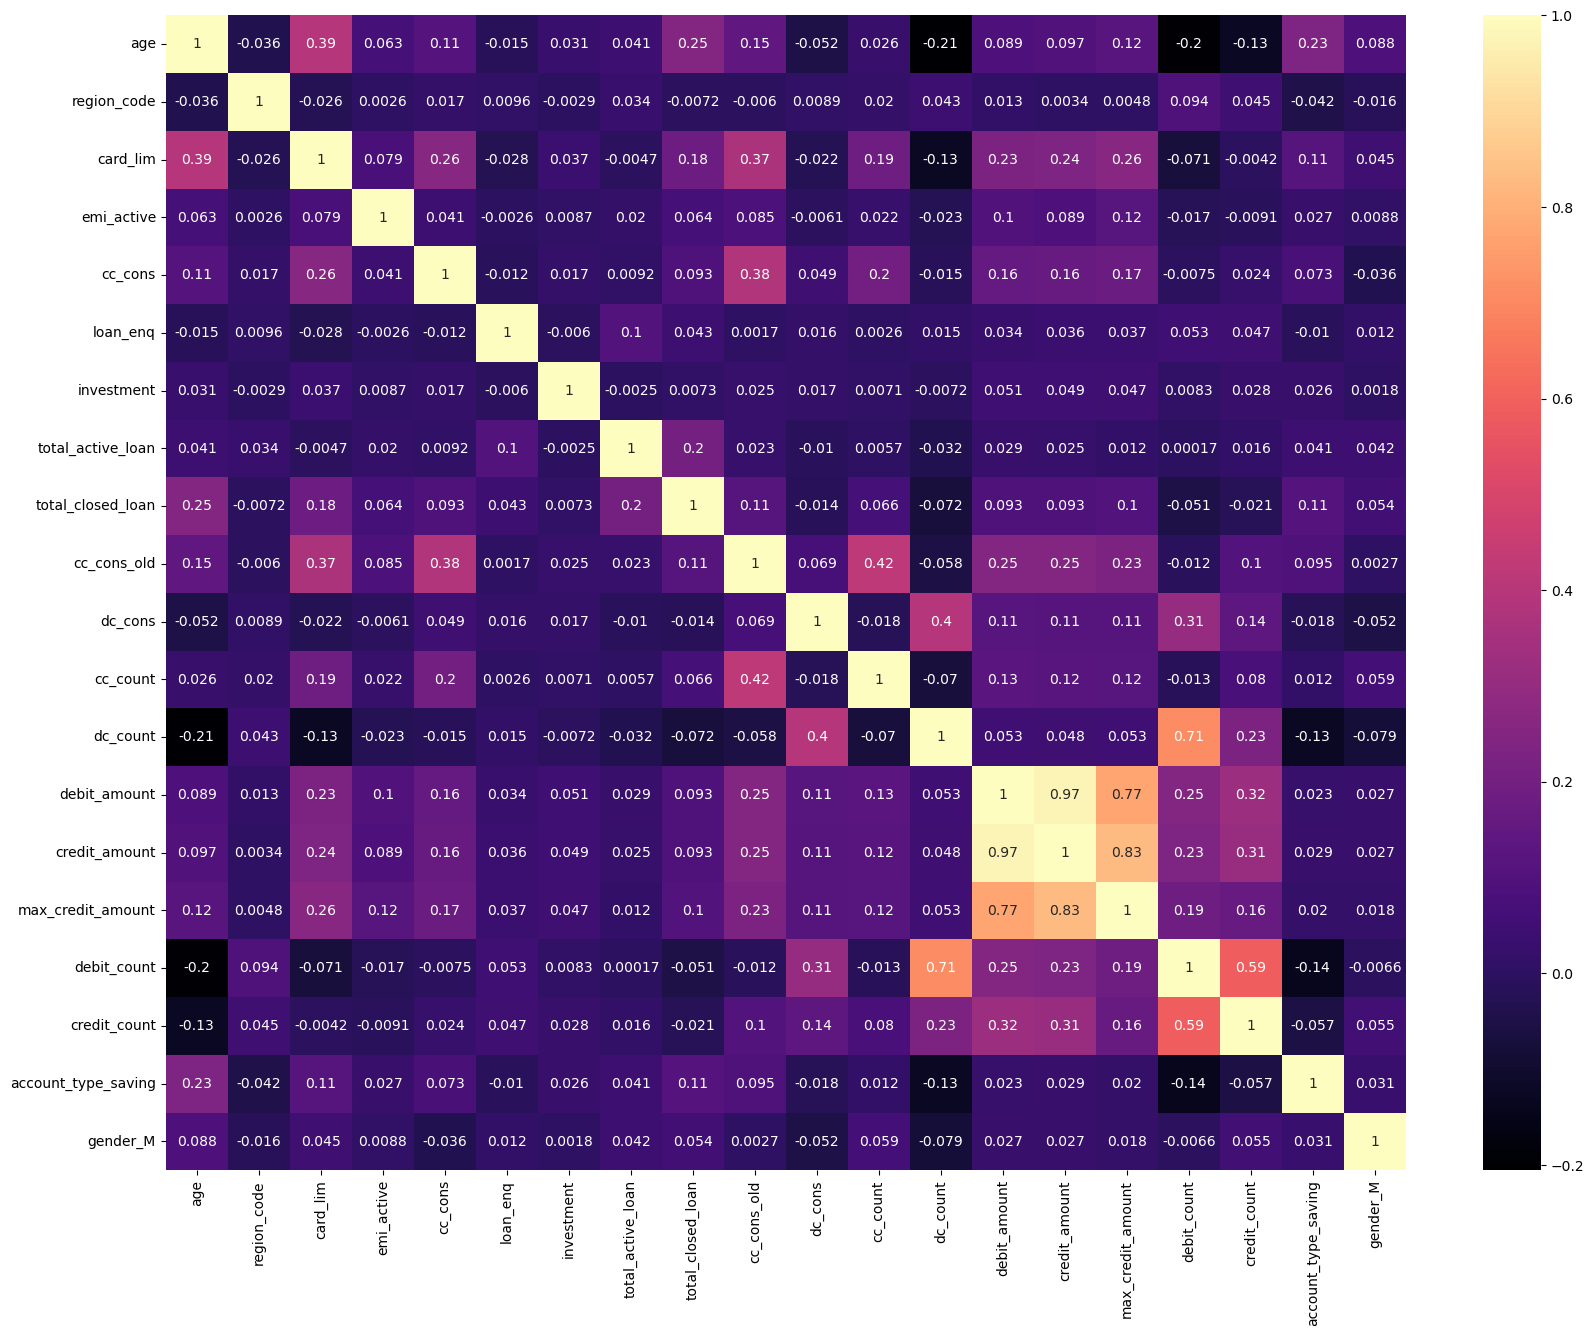

In [112]:
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(df.corr(),annot=True, cmap='magma')

<Axes: >

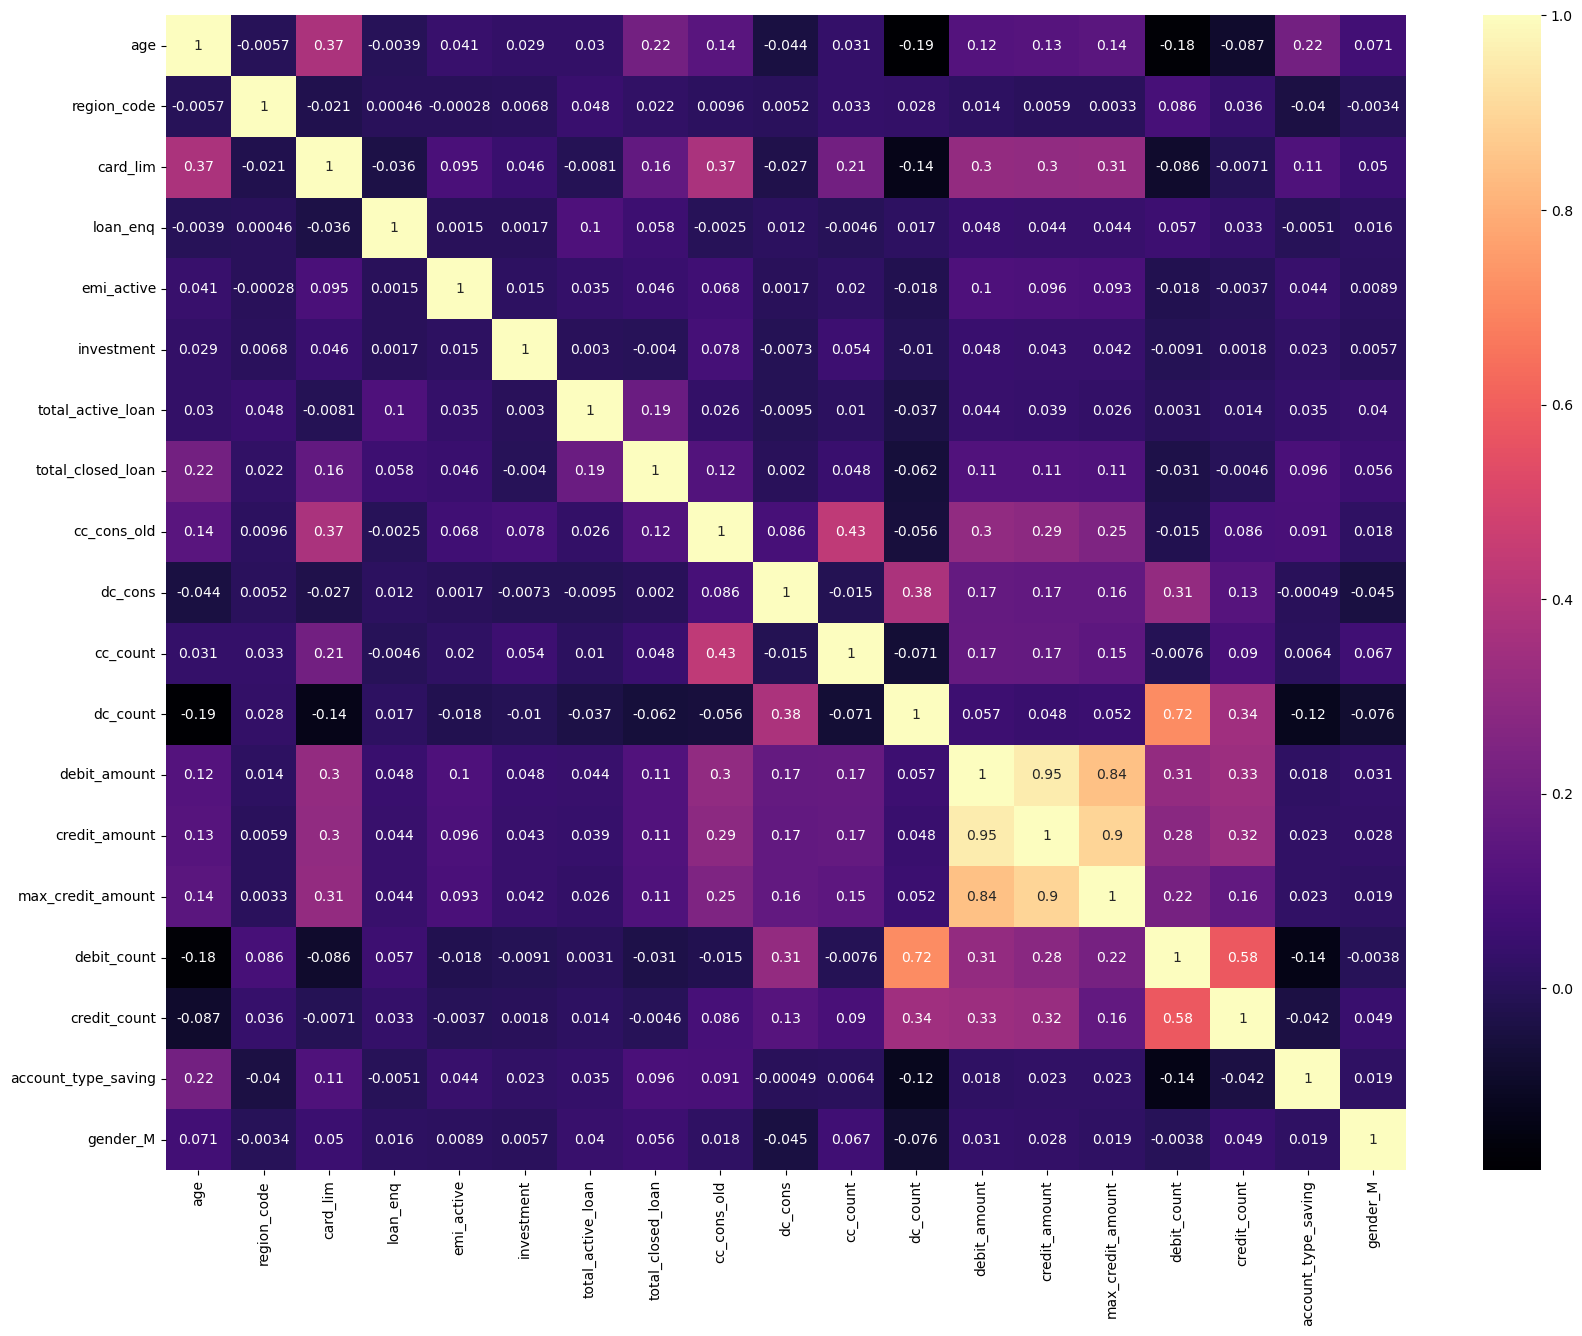

In [110]:
import seaborn as sns
plt.subplots(figsize=(20,15))
sns.heatmap(df_test.corr(),annot=True, cmap='magma')

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.gridspec as gridspec  # Import gridspec


# Function to create EDA charts
def chart_plot(df, feature):
    fig = plt.figure(constrained_layout=True, figsize=(20, 5))
    grid = gridspec.GridSpec(ncols=2, nrows=2, figure=fig)

    ax1 = fig.add_subplot(grid[0, 0])
    ax1.set_title('Histogram')
    sns.distplot(df.loc[:, feature], norm_hist=True, ax=ax1, bins=50)
    plt.axvline(x=df[feature].mean(), c='red')
    plt.axvline(x=df[feature].median(), c='green')

    ax2 = fig.add_subplot(grid[1, 0])
    ax2.set_title('Box Plot')
    sns.boxplot(df.loc[:, feature], orient='h', ax=ax2)


/var/folders/jp/qtd0tbk97qq9jnjpspp9smy00000gp/T/ipykernel_84222/3877887357.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist=True, ax=ax1, bins=50)


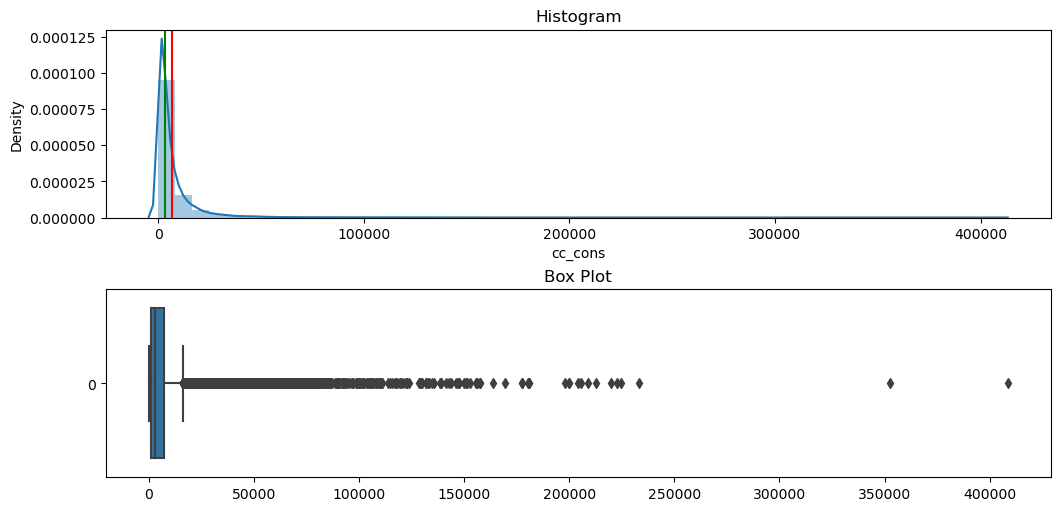

In [13]:
# Example of using chart_plot
chart_plot(data, 'cc_cons')


/var/folders/jp/qtd0tbk97qq9jnjpspp9smy00000gp/T/ipykernel_84222/3877887357.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist=True, ax=ax1, bins=50)


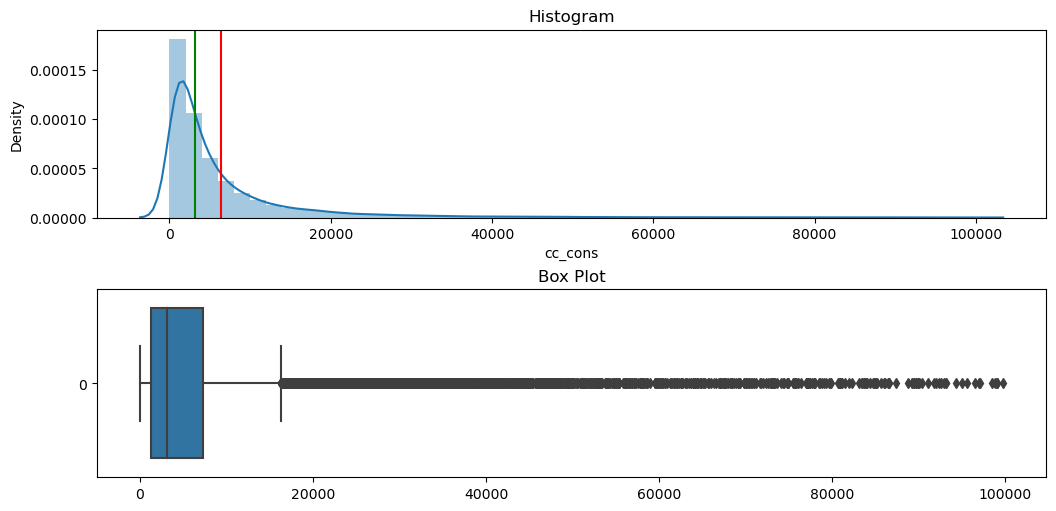

In [14]:
 df.drop(df[df['cc_cons'] >= 100000].index, inplace = True)
chart_plot(df, 'cc_cons')

/var/folders/jp/qtd0tbk97qq9jnjpspp9smy00000gp/T/ipykernel_84222/3877887357.py:13: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df.loc[:, feature], norm_hist=True, ax=ax1, bins=50)


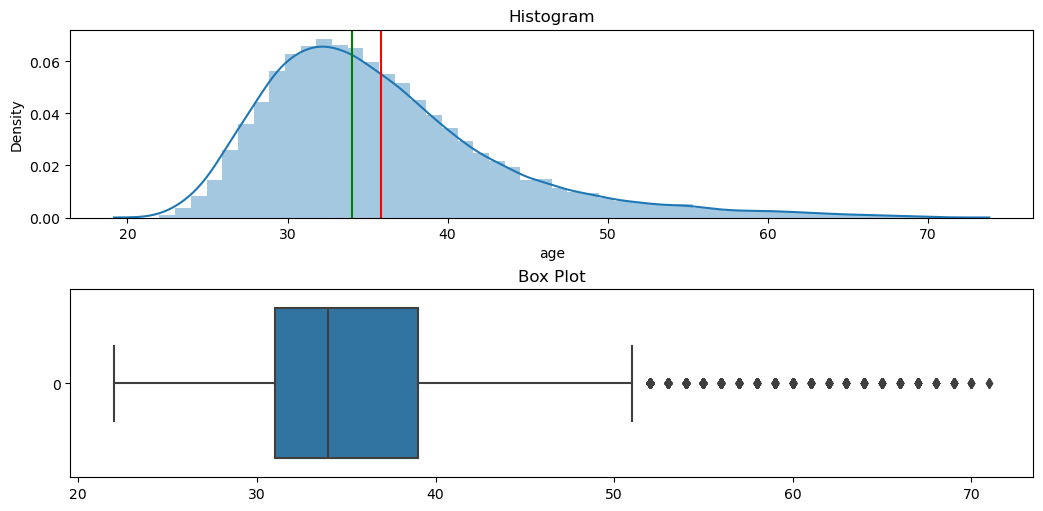

In [15]:
 df.drop(df[df['age'] >= 100].index, inplace = True)
chart_plot(df, 'age')

# Handling Missing Values


In [16]:
def null_table(data):
     # Get the column names (indices) and the count of null values for each column.
    indices = data.isnull().sum().index
    values = data.isnull().sum().values

    # Calculate the percentage of null values for each column and store them in the 'percentages' list.
    percentages = []
    for i in indices:
        percentages.append((data[i].isnull().sum() / data[i].shape[0]) * 100)

    # Create a dictionary with the column names, count of null values, and null value percentages.
    d = {'Columns': indices, 'Count of Null Values': values, 'Null_values_percentage': percentages}

    # Create a DataFrame from the dictionary and return it.
    null_frame = pd.DataFrame(data=d)
    return null_frame

In [17]:
# Use the 'null_table' function to create a DataFrame 'null_frame_train' containing information about null values.
null_frame_train = null_table(df)

In [18]:
# Sort the 'null_frame_train' DataFrame based on the 'Null_values_percentage' column in ascending order.
sorted_null_frame_train = null_frame_train.sort_values(by='Null_values_percentage')
sorted_null_frame_train


,Columns,Count of Null Values,Null_values_percentage
0,age,0,0.000000
39,cc_cons,0,0.000000
41,gender,0,0.000000
40,account_type,0,0.000000
6,cc_cons_jun,0,0.000000
38,emi_active,0,0.000000
4,cc_cons_may,0,0.000000
2,cc_cons_apr,0,0.000000
1,region_code,0,0.000000
14,card_lim,9,0.027524


In [19]:
# Use the 'null_table' function to create a DataFrame 'null_frame_test' for the 'df_test' dataset.
null_frame_test = null_table(df_test)

In [20]:
 # Sort the 'null_frame_test' DataFrame based on the 'Null_values_percentage' column in ascending order.
sorted_null_frame_test = null_frame_test.sort_values(by='Null_values_percentage')
sorted_null_frame_test

,Columns,Count of Null Values,Null_values_percentage
0,account_type,0,0.000000
8,cc_cons_jun,0,0.000000
6,cc_cons_may,0,0.000000
4,cc_cons_apr,0,0.000000
41,emi_active,0,0.000000
2,age,0,0.000000
1,gender,0,0.000000
3,region_code,0,0.000000
16,card_lim,3,0.021327
11,cc_count_may,542,3.852989


# Feature Engineering


In [21]:
df.columns

Index(['age', 'region_code', 'cc_cons_apr', 'dc_cons_apr', 'cc_cons_may',
       'dc_cons_may', 'cc_cons_jun', 'dc_cons_jun', 'cc_count_apr',
       'cc_count_may', 'cc_count_jun', 'dc_count_apr', 'dc_count_may',
       'dc_count_jun', 'card_lim', 'personal_loan_active',
       'vehicle_loan_active', 'personal_loan_closed', 'vehicle_loan_closed',
       'investment_1', 'investment_2', 'investment_3', 'investment_4',
       'debit_amount_apr', 'credit_amount_apr', 'debit_count_apr',
       'credit_count_apr', 'max_credit_amount_apr', 'debit_amount_may',
       'credit_amount_may', 'credit_count_may', 'debit_count_may',
       'max_credit_amount_may', 'debit_amount_jun', 'credit_amount_jun',
       'credit_count_jun', 'debit_count_jun', 'max_credit_amount_jun',
       'emi_active', 'cc_cons', 'account_type', 'gender', 'loan_enq'],
      dtype='object')

In [22]:
# combining columns and creating new features
df["investment"] = df[['investment_1', 'investment_2', 'investment_3', 'investment_4']].sum(axis=1)
df["total_active_loan"] = df[['personal_loan_active', 'vehicle_loan_active']].sum(axis=1)
df["total_closed_loan"] = df[['personal_loan_closed', 'vehicle_loan_closed']].sum(axis=1)

In [23]:
# Taking the mean of columns and creating new features
df['cc_cons_old'] = df[['cc_cons_apr', 'cc_cons_may', 'cc_cons_jun']].mean(axis=1)
df['dc_cons'] = df[['dc_cons_apr', 'dc_cons_may', 'dc_cons_jun']].mean(axis=1)
df['cc_count'] = df[['cc_count_apr', 'cc_count_may', 'cc_count_jun']].mean(axis=1)
df['dc_count'] = df[['dc_count_apr', 'dc_count_may', 'dc_count_jun']].mean(axis=1)
df['debit_amount'] = df[['debit_amount_apr', 'debit_amount_may', 'debit_amount_jun']].mean(axis=1)
df['credit_amount'] = df[['credit_amount_apr', 'credit_amount_may', 'credit_amount_jun']].mean(axis=1)
df['max_credit_amount'] = df[['max_credit_amount_apr', 'max_credit_amount_may', 'max_credit_amount_jun']].mean(axis=1)
df['debit_count'] = df[['debit_count_apr', 'debit_count_may', 'debit_count_jun']].mean(axis=1)
df['credit_count'] = df[['credit_count_apr', 'credit_count_may', 'credit_count_jun']].mean(axis=1)


In [24]:
 df_test["investment"]= df_test[['investment_1','investment_2','investment_3','investment_4']].sum(axis=1)
df_test["totat_active_loan"]= df_test[['personal_loan_active','vehicle_loan_active']].sum(axis=1)
df_test["total_closed_loan"]= df_test[['personal_loan_closed','vehicle_loan_closed']].sum(axis=1)

In [25]:
 # taking mean of the columns
df_test['cc_cons_old'] = df_test[['cc_cons_apr', 'cc_cons_may','cc_cons_jun']].mean(axis=1)
df_test['dc_cons'] = df_test[['dc_cons_apr', 'dc_cons_may','dc_cons_jun']].mean(axis=1)
df_test['cc_count'] = df_test[['cc_count_apr', 'cc_count_may','cc_count_jun']].mean(axis=1)
df_test['dc_count'] = df_test[['dc_count_apr', 'dc_count_may','dc_count_jun']].mean(axis=1)
df_test['debit_amount'] = df_test[['debit_amount_apr', 'debit_amount_may','debit_amount_jun']].mean(axis=1)
df_test['credit_amount'] = df_test[['credit_amount_apr', 'credit_amount_may','credit_amount_jun']].mean(axis=1)
df_test['max_credit_amount'] = df_test[['max_credit_amount_apr', 'max_credit_amount_may','max_credit_amount_jun']].mean(axis=1)
df_test['debit_count'] = df_test[['debit_count_apr', 'debit_count_may','debit_count_jun']].mean(axis=1)
df_test['credit_count'] = df_test[['credit_count_apr', 'credit_count_may','credit_count_jun']].mean(axis=1)
 

In [26]:
cols_to_delete = ['investment_1',
                    'investment_2',
                    'investment_3',
                    'investment_4',
                    'personal_loan_active',
                    'vehicle_loan_active',
                    'personal_loan_closed',
                    'vehicle_loan_closed',
                    'cc_cons_apr',
                    'cc_cons_may',
                    'cc_cons_jun',
                    'dc_cons_apr',
                    'dc_cons_may',
                    'dc_cons_jun',
                    'cc_count_apr',
                    'cc_count_may',
                    'cc_count_jun',
                    'dc_count_apr',
                    'dc_count_may',
                    'dc_count_jun',
                    'debit_amount_apr',
                    'debit_amount_may',
                    'debit_amount_jun',
                    'credit_amount_apr',
                    'credit_amount_may',
                    'credit_amount_jun',
                    'max_credit_amount_apr',
                    'max_credit_amount_may',
                    'max_credit_amount_jun',
                    'debit_count_apr',
                    'debit_count_may',
                    'debit_count_jun',
                    'credit_count_apr',
                    'credit_count_may',
                    'credit_count_jun'
                    ]

In [27]:
# Drop the specified columns from the DataFrame
df = df.drop(columns = cols_to_delete)
df_test= df_test.drop(columns = cols_to_delete)

In [28]:
df.head()


,age,region_code,card_lim,emi_active,cc_cons,account_type,gender,loan_enq,investment,total_active_loan,total_closed_loan,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,63,305,150000.0,0.00,435,saving,M,NaN,168845.2,0.0,0.0,2932.000000,NaN,2.0,NaN,32053.846667,55263.456667,31823.333333,2.666667,3.666667
1,33,326,176000.0,4963.33,1921,current,M,NaN,0.0,0.0,1.0,27887.333333,1897.48,12.0,3.500000,128063.756667,133269.333333,82333.333333,16.333333,7.666667
2,44,264,65000.0,0.00,1970,current,M,NaN,0.0,0.0,0.0,11209.376667,1725.84,7.0,6.333333,37864.850000,30430.303333,15433.333333,14.000000,4.000000
3,44,233,600000.0,1238.18,21579,saving,M,NaN,132442.0,0.0,0.0,11602.833333,NaN,7.0,NaN,8922.953333,9789.000000,8866.666667,1.333333,1.666667
4,35,324,100000.0,0.00,1814,saving,F,NaN,0.0,0.0,0.0,1928.373333,NaN,6.0,NaN,13367.016667,22316.000000,19333.333333,4.333333,2.333333


In [29]:
  df_test.head()

,account_type,gender,age,region_code,card_lim,loan_enq,emi_active,investment,totat_active_loan,total_closed_loan,cc_cons_old,dc_cons,cc_count,dc_count,debit_amount,credit_amount,max_credit_amount,debit_count,credit_count
0,saving,M,36,447,75000.0,NaN,0.00,0.0,0.0,1.0,8049.900000,1170.0,4.666667,1.000000,16551.236667,15283.173333,11666.666667,7.333333,2.333333
1,current,M,31,233,116000.0,NaN,0.00,0.0,0.0,0.0,34978.856667,NaN,22.666667,NaN,NaN,NaN,NaN,NaN,NaN
2,current,M,26,823,40000.0,NaN,2885.82,0.0,0.0,0.0,3984.763333,1158.0,3.333333,4.666667,69166.233333,69600.666667,31759.333333,23.333333,4.000000
3,current,M,39,878,86000.0,NaN,0.00,0.0,0.0,0.0,12382.900000,NaN,14.333333,NaN,60989.516667,70819.333333,39544.666667,7.666667,5.333333
4,current,M,44,404,250000.0,NaN,3342.58,0.0,0.0,0.0,23048.493333,NaN,33.333333,NaN,32321.346667,34849.666667,29666.666667,4.333333,1.666667


In [30]:
print("df_test shape:", df_test.shape)

df_test shape: (14067, 19)


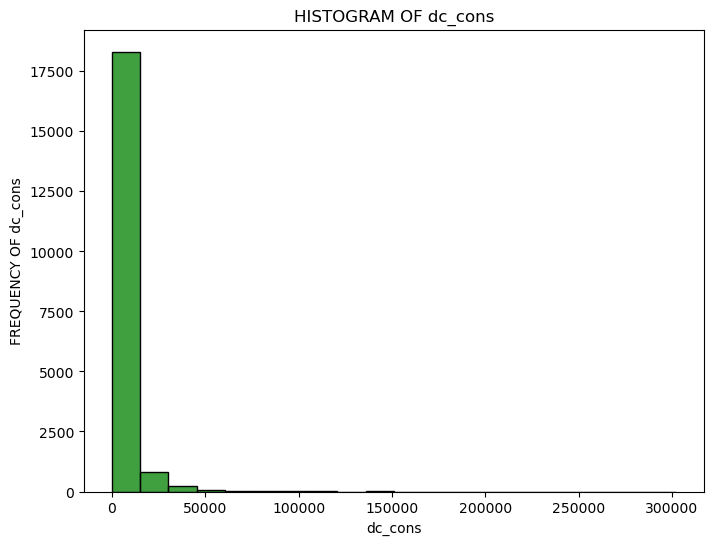

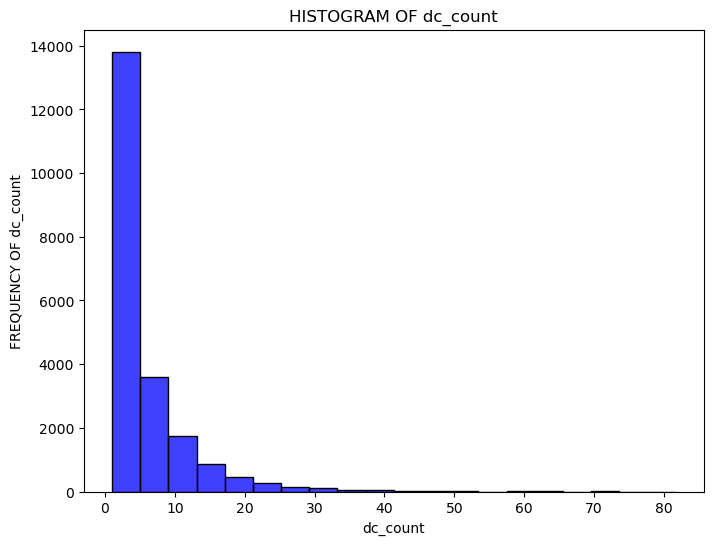

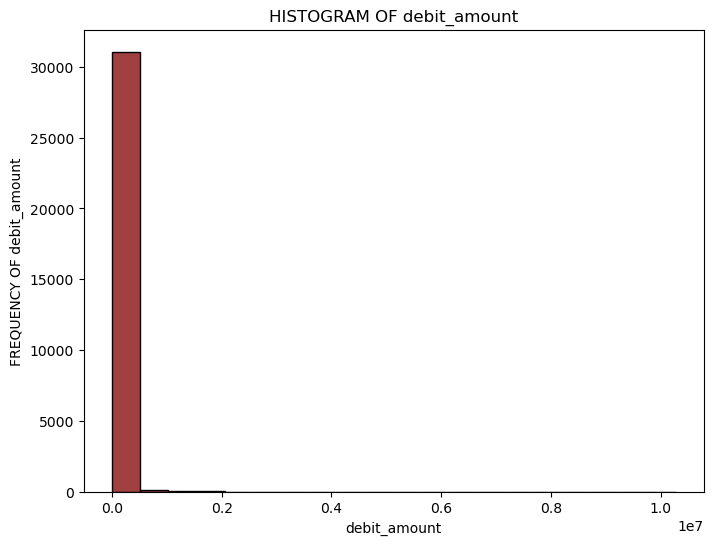

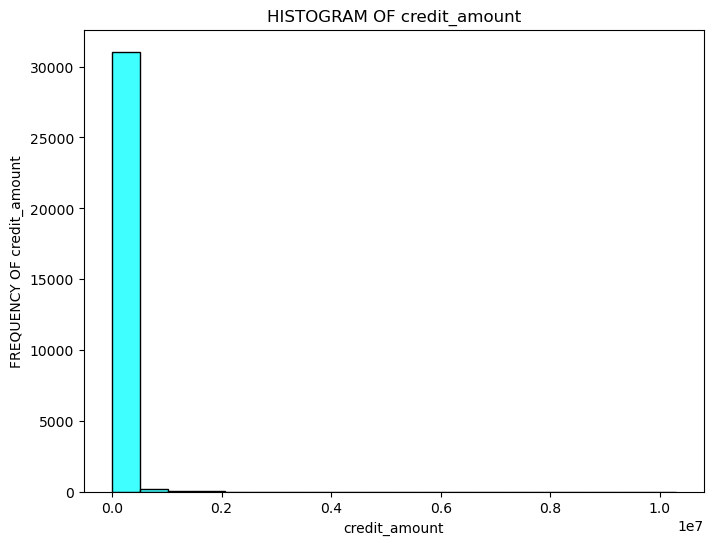

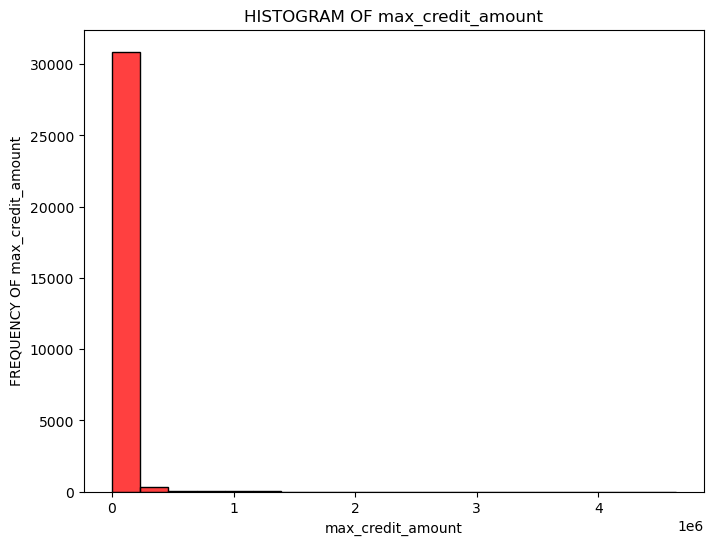

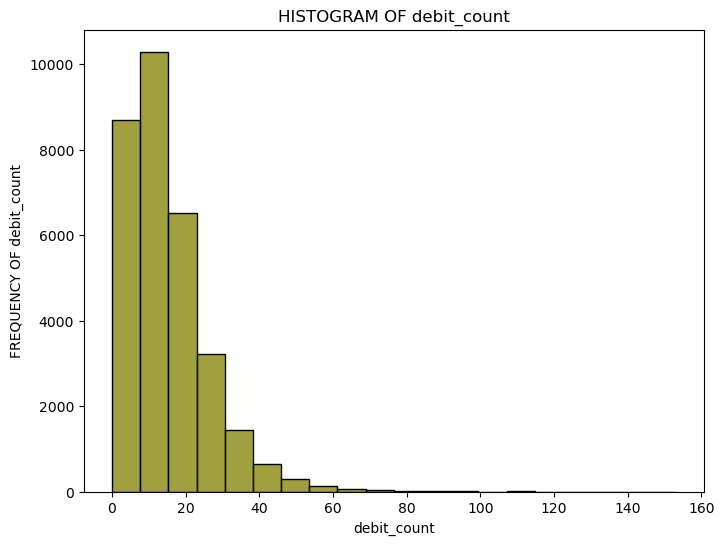

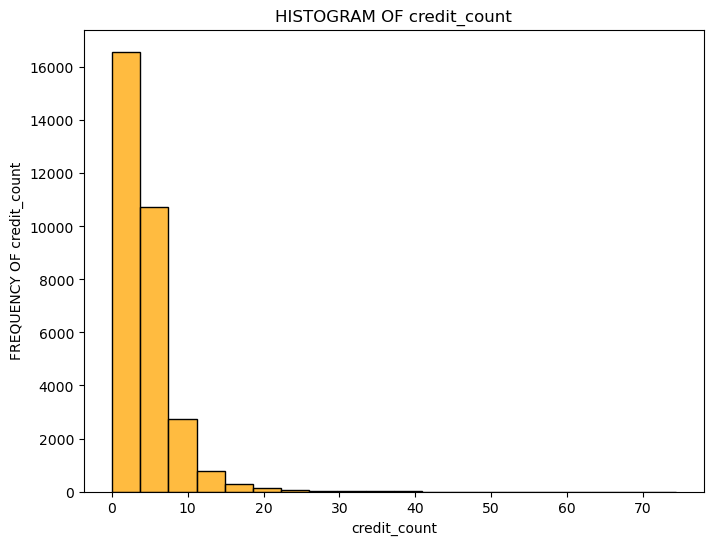

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns

# Column: 'dc_cons'
plt.figure(figsize=(8, 6))
sns.histplot(df['dc_cons'], bins=20, color="green")
plt.title("HISTOGRAM OF dc_cons")
plt.xlabel("dc_cons")
plt.ylabel("FREQUENCY OF dc_cons")
plt.show()

# Column: 'dc_count'
plt.figure(figsize=(8, 6))
sns.histplot(df['dc_count'], bins=20, color="blue")
plt.title("HISTOGRAM OF dc_count")
plt.xlabel("dc_count")
plt.ylabel("FREQUENCY OF dc_count")
plt.show()

 

# Column: 'debit_amount'
plt.figure(figsize=(8, 6))
sns.histplot(df['debit_amount'], bins=20, color="maroon")
plt.title("HISTOGRAM OF debit_amount")
plt.xlabel("debit_amount")
plt.ylabel("FREQUENCY OF debit_amount")
plt.show()

# Column: 'credit_amount'
plt.figure(figsize=(8, 6))
sns.histplot(df['credit_amount'], bins=20, color="cyan")
plt.title("HISTOGRAM OF credit_amount")
plt.xlabel("credit_amount")
plt.ylabel("FREQUENCY OF credit_amount")
plt.show()

# Column: 'max_credit_amount'
plt.figure(figsize=(8, 6))
sns.histplot(df['max_credit_amount'], bins=20, color="red")
plt.title("HISTOGRAM OF max_credit_amount")
plt.xlabel("max_credit_amount")
plt.ylabel("FREQUENCY OF max_credit_amount")
plt.show()

# Column: 'debit_count'
plt.figure(figsize=(8, 6))
sns.histplot(df['debit_count'], bins=20, color="olive")
plt.title("HISTOGRAM OF debit_count")
plt.xlabel("debit_count")
plt.ylabel("FREQUENCY OF debit_count")
plt.show()

# Column: 'credit_count'
plt.figure(figsize=(8, 6))
sns.histplot(df['credit_count'], bins=20, color="orange")
plt.title("HISTOGRAM OF credit_count")
plt.xlabel("credit_count")
plt.ylabel("FREQUENCY OF credit_count")
plt.show()

In [32]:
null_frame_train = null_table(df)
null_frame_train.sort_values(by = 'Null_values_percentage').tail()

,Columns,Count of Null Values,Null_values_percentage
17,max_credit_amount,1434,4.385455
15,debit_amount,1455,4.449677
14,dc_count,11538,35.285483
12,dc_cons,13180,40.307043
7,loan_enq,32092,98.143674


In [33]:
df.loan_enq.value_counts()


Y    607
Name: loan_enq, dtype: int64

In [34]:
# Handling missing values in the 'loan_enq' column
# Fill missing values with 0
df['loan_enq'].fillna(0, inplace=True)
# Replace 'Y' with 1 and remaining NaN values with 0
df['loan_enq'].replace(to_replace=dict(Y=1, NaN=0), inplace=True)

# For the test dataset
# Fill missing values with 0
df_test['loan_enq'].fillna(0, inplace=True)
# Replace 'Y' with 1 and remaining NaN values with 0
df_test['loan_enq'].replace(to_replace=dict(Y=1, NaN=0), inplace=True)

In [35]:
df.loan_enq

0        0
1        0
2        0
3        0
4        0
        ..
32815    0
32816    0
32817    0
32818    0
32819    0
Name: loan_enq, Length: 32699, dtype: int64

In [36]:
# Identify columns with missing values and store their names in 'na_cols'
na_cols = list(df.columns[df.isnull().any()].values)

# Display the list of columns with missing values
na_cols

['card_lim',
 'dc_cons',
 'dc_count',
 'debit_amount',
 'credit_amount',
 'max_credit_amount',
 'debit_count',
 'credit_count']

In [37]:
# Fill missing values in 'df' with zeros
df.fillna(0, inplace = True)

# For the test dataset, Fill missing values in 'df_test' with zeros
df_test.fillna(0, inplace = True)

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32699 entries, 0 to 32819
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                32699 non-null  int64  
 1   region_code        32699 non-null  int64  
 2   card_lim           32699 non-null  float64
 3   emi_active         32699 non-null  float64
 4   cc_cons            32699 non-null  int64  
 5   account_type       32699 non-null  object 
 6   gender             32699 non-null  object 
 7   loan_enq           32699 non-null  int64  
 8   investment         32699 non-null  float64
 9   total_active_loan  32699 non-null  float64
 10  total_closed_loan  32699 non-null  float64
 11  cc_cons_old        32699 non-null  float64
 12  dc_cons            32699 non-null  float64
 13  cc_count           32699 non-null  float64
 14  dc_count           32699 non-null  float64
 15  debit_amount       32699 non-null  float64
 16  credit_amount      326

In [39]:
# Calculate the null values after filling with zeros
null_frame_train = null_table(df)

# Sort the DataFrame based on the 'Null_values_percentage' column in ascending order
sorted_null_frame_train = null_frame_train.sort_values(by='Null_values_percentage')

# Display the sorted DataFrame to view columns with null values
sorted_null_frame_train

,Columns,Count of Null Values,Null_values_percentage
0,age,0,0.0
17,max_credit_amount,0,0.0
16,credit_amount,0,0.0
15,debit_amount,0,0.0
14,dc_count,0,0.0
13,cc_count,0,0.0
12,dc_cons,0,0.0
11,cc_cons_old,0,0.0
10,total_closed_loan,0,0.0
9,total_active_loan,0,0.0


In [40]:
print("df_test shape:", df_test.shape)

df_test shape: (14067, 19)


# Encoding Categorical Variables


In [41]:
# Identify categorical columns in 'df' and store their names in 'cat_cols1'
cat_cols1 = df.select_dtypes(include=[object]).columns.to_list()

# Display the list of categorical columns
cat_cols1

['account_type', 'gender']

In [42]:
# Perform one-hot encoding on categorical columns in 'df'
df = pd.get_dummies(df, prefix=['account_type', 'gender'], drop_first=True)

# Perform one-hot encoding on categorical columns in 'df_test'
df_test = pd.get_dummies(df_test, prefix=['account_type', 'gender'], drop_first=True)

In [43]:
print("df_test shape:", df_test.shape)

df_test shape: (14067, 19)


In [44]:
df.columns

Index(['age', 'region_code', 'card_lim', 'emi_active', 'cc_cons', 'loan_enq',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')

In [45]:
df_test.columns

Index(['age', 'region_code', 'card_lim', 'loan_enq', 'emi_active',
       'investment', 'totat_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')

In [46]:
 # Define the feature matrix 'X' by dropping the 'cc_cons' column
X = df.drop(columns='cc_cons')

# Define the target variable 'y'
y = df.loc[:, 'cc_cons']

# Split the data into training and validation (test) sets (70% train, 30% test) with a random seed for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)



X_train shape: (22889, 19)
y_train shape: (22889,)
X_test shape: (9810, 19)
y_test shape: (9810,)


# MODEL TRAINING

In [47]:
 
models = [ HuberRegressor(),
          GradientBoostingRegressor(),
          RandomForestRegressor(),
          DecisionTreeRegressor()
         ]

model_names = ['HuberRegressor()',
          'GradientBoostingRegressor()',
          'RandomForestRegressor()',
          'DecisionTreeRegressor()'
              ]

In [48]:
print(X_train.columns)
print(df_test.columns)

Index(['age', 'region_code', 'card_lim', 'emi_active', 'loan_enq',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')
Index(['age', 'region_code', 'card_lim', 'loan_enq', 'emi_active',
       'investment', 'totat_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')


In [49]:
import numpy as np
import time
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_log_error

def train_and_evaluate(model, model_name):
    # Start timing the training process
    start_time = time.time()

    # Train the model on the training data
    model.fit(X_train, y_train)

    # Make predictions on the test data
    test_pred = model.predict(X_test)

    # Calculate Mean Squared Error (MSE)
    mse = np.square(np.subtract(y_test,test_pred)).mean()

    # Calculate R-squared
    r2 = r2_score(y_test, test_pred)


    # Calculate Explained Variance Score (EVS)
    evs = explained_variance_score(y_test, test_pred)

    # Calculate Root Mean Squared Logarithmic Error (RMSLE)
    rmsle = np.sqrt(np.mean(np.square(np.log1p(test_pred) - np.log1p(y_test))))


    # Calculate the time taken for training and evaluation
    end_time = time.time()
    training_time = end_time - start_time

    return {
        'Model Name': model_name,
        'Mean Squared Error': mse,
        'R-squared': r2,
        'Explained Variance Score': evs,
        'RMSLE': rmsle,
        'Training Time (seconds)': training_time
    }

In [50]:
 results = []

for model, model_name in zip(models, model_names):
    print("-------------------")
    print("Starting Model =", model_name)
    result = train_and_evaluate(model, model_name)
    results.append(result)


-------------------
Starting Model = HuberRegressor()


/Users/mallineni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


-------------------
Starting Model = GradientBoostingRegressor()
-------------------
Starting Model = RandomForestRegressor()
-------------------
Starting Model = DecisionTreeRegressor()


In [51]:
res_df = pd.DataFrame(results)
res_df

,Model Name,Mean Squared Error,R-squared,Explained Variance Score,RMSLE,Training Time (seconds)
0,HuberRegressor(),8.109236e+07,0.094026,0.164109,1.209953,0.767828
1,GradientBoostingRegressor(),7.296286e+07,0.184850,0.185008,1.358621,5.110114
2,RandomForestRegressor(),7.678561e+07,0.142141,0.147496,1.395811,21.198820
3,DecisionTreeRegressor(),1.648422e+08,-0.841639,-0.834913,1.681188,0.332469


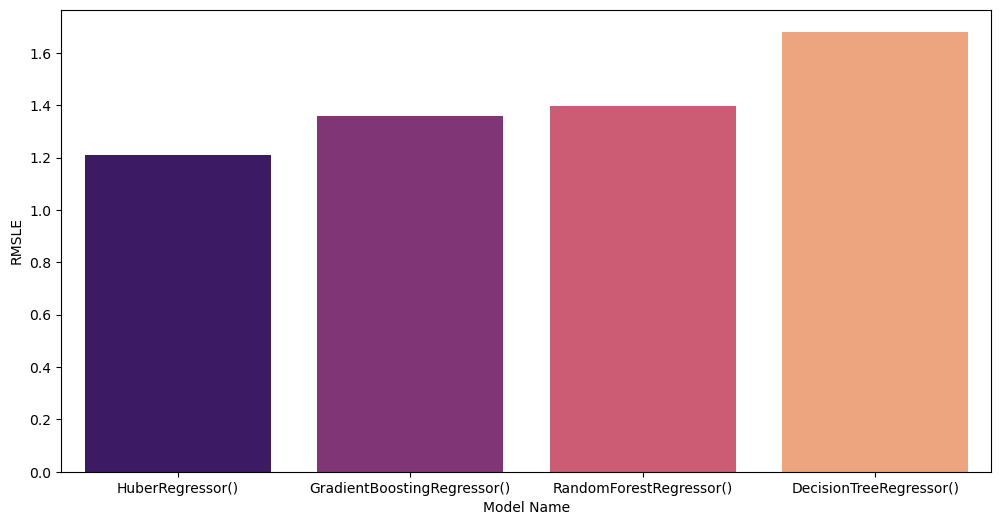

In [52]:
# Sort the DataFrame by MSE in ascending order
df_sorted = res_df.sort_values(by='RMSLE')

plt.figure(figsize=(12, 6))
sns.barplot(x='Model Name', y= 'RMSLE', data=df_sorted, palette='magma')
plt.title('')
plt.xlabel('Model Name')
plt.ylabel('RMSLE')
plt.show()

In [53]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (22889, 19)
y_train shape: (22889,)
X_test shape: (9810, 19)
y_test shape: (9810,)


In [54]:
print("Column names in X_train:")
print(X_train.columns)

print("Column names in df_test:")
print(df_test.columns)

Column names in X_train:
Index(['age', 'region_code', 'card_lim', 'emi_active', 'loan_enq',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')
Column names in df_test:
Index(['age', 'region_code', 'card_lim', 'loan_enq', 'emi_active',
       'investment', 'totat_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')


In [55]:
for col in X_train.columns:
    if col not in df_test.columns:
        print(f"Column '{col}' not found in df_test")

Column 'total_active_loan' not found in df_test


In [56]:
# Correct the typo in df_test
df_test = df_test.rename(columns={'totat_active_loan': 'total_active_loan'})

# Now, reorder the columns
df_test_reordered = df_test[X_train.columns]

# Check if the columns now match
print(df_test_reordered.columns)
print(X_train.columns)

Index(['age', 'region_code', 'card_lim', 'emi_active', 'loan_enq',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')
Index(['age', 'region_code', 'card_lim', 'emi_active', 'loan_enq',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')


In [93]:
print(df.columns)
  

Index(['age', 'region_code', 'card_lim', 'emi_active', 'cc_cons', 'loan_enq',
       'investment', 'total_active_loan', 'total_closed_loan', 'cc_cons_old',
       'dc_cons', 'cc_count', 'dc_count', 'debit_amount', 'credit_amount',
       'max_credit_amount', 'debit_count', 'credit_count',
       'account_type_saving', 'gender_M'],
      dtype='object')


# HYPER PARAMETER TUNING


In [ ]:
# Import necessary libraries
# from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
# param_grid = {
#     'epsilon': [1.0, 1.2, 1.5],  # You can adjust these values
#     'alpha': [0.0001, 0.001, 0.01]  # You can adjust these values
# }

# Create the HuberRegressor model
# huber_model = HuberRegressor()

# Create the GridSearchCV object
# grid_search = GridSearchCV(huber_model, param_grid, scoring='neg_mean_squared_error', cv=5)

# Fit the grid search to your training data
# grid_search.fit(X_train, y_train)

# Get the best hyperparameters
# best_params = grid_search.best_params_

# Train the HuberRegressor model with the best hyperparameters
# best_huber_model = HuberRegressor(**best_params)
# best_huber_model.fit(X_train, y_train)

# Make predictions on the test data using the best model
# y_pred_best_huber = best_huber_model.predict(X_test)

# Calculate RMSLE for the predictions
# rmsle_best_huber = np.sqrt(np.mean(np.square(np.log1p(y_pred_best_huber) - np.log1p(y_test))))

# Print the best hyperparameters and RMSLE
# print("Best Hyperparameters:", best_params)
# print("RMSLE


# FINAL OUTPUT¶

In [77]:
  
 # Assuming you've chosen a model for predictions (e.g., RandomForestRegressor)
# Train the model on the entire training dataset (X, y)
best_model = HuberRegressor()  # Replace with your chosen model
best_model.fit(X, y)

# Reorder the columns in df_test to match the order of X
df_test_reordered = df_test.reindex(columns=X.columns)

# Make predictions on the modified test data
y_pred = best_model.predict(df_test_reordered)

 


/Users/mallineni/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_huber.py:342: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [79]:
# Create a DataFrame with 'id' and 'cc_cons' columns
output_df = pd.DataFrame({'id': test_id, 'cc_cons': y_pred})

# Save the DataFrame to a CSV file
output_df.to_csv("/Users/mallineni/Library/CloudStorage/OneDrive-TVSMotorCompanyLtd/Desktop/output.csv",index=False) 